In [1]:
import numpy as np
import pandas as pd

# Visualizations
import matplotlib.pyplot as plt
import plotly.express as px

Weather data: [link](https://www.kaggle.com/datasets/alistairking/weather-long-term-time-series-forecasting?resource=download)


# data preparation

In [248]:
weather = pd.read_csv('cleaned_weather.csv')
weather.head(10)

,date,p,T,Tpot,Tdew,rh,VPmax,VPact,VPdef,sh,...,rho,wv,max. wv,wd,rain,raining,SWDR,PAR,max. PAR,Tlog
0,2020-01-01 00:10:00,1008.89,0.71,273.18,-1.33,86.1,6.43,5.54,0.89,3.42,...,1280.62,1.02,1.60,224.3,0.0,0.0,0.0,0.0,0.0,11.45
1,2020-01-01 00:20:00,1008.76,0.75,273.22,-1.44,85.2,6.45,5.49,0.95,3.39,...,1280.33,0.43,0.84,206.8,0.0,0.0,0.0,0.0,0.0,11.51
2,2020-01-01 00:30:00,1008.66,0.73,273.21,-1.48,85.1,6.44,5.48,0.96,3.39,...,1280.29,0.61,1.48,197.1,0.0,0.0,0.0,0.0,0.0,11.60
3,2020-01-01 00:40:00,1008.64,0.37,272.86,-1.64,86.3,6.27,5.41,0.86,3.35,...,1281.97,1.11,1.48,206.4,0.0,0.0,0.0,0.0,0.0,11.70
4,2020-01-01 00:50:00,1008.61,0.33,272.82,-1.50,87.4,6.26,5.47,0.79,3.38,...,1282.08,0.49,1.40,209.6,0.0,0.0,0.0,0.0,0.0,11.81
5,2020-01-01 01:00:00,1008.44,0.34,272.84,-1.54,87.1,6.26,5.45,0.81,3.37,...,1281.84,0.63,1.32,188.0,0.0,0.0,0.0,0.0,0.0,11.91
6,2020-01-01 01:10:00,1008.49,0.19,272.69,-1.65,87.4,6.19,5.41,0.78,3.34,...,1282.63,0.88,1.28,195.4,0.0,0.0,0.0,0.0,0.0,12.00
7,2020-01-01 01:20:00,1008.40,0.03,272.53,-1.70,88.1,6.12,5.39,0.73,3.33,...,1283.30,1.05,1.64,183.1,0.0,0.0,0.0,0.0,0.0,12.07
8,2020-01-01 01:30:00,1008.29,0.11,272.63,-1.61,88.1,6.16,5.43,0.73,3.35,...,1282.73,0.90,1.72,199.9,0.0,0.0,0.0,0.0,0.0,12.12
9,2020-01-01 01:40:00,1008.28,0.22,272.73,-1.62,87.4,6.20,5.42,0.78,3.35,...,1282.24,0.62,1.04,123.9,0.0,0.0,0.0,0.0,0.0,12.14


In [249]:
weather.tail()

,date,p,T,Tpot,Tdew,rh,VPmax,VPact,VPdef,sh,...,rho,wv,max. wv,wd,rain,raining,SWDR,PAR,max. PAR,Tlog
52691,2020-12-31 23:20:00,978.32,2.28,277.16,-0.80,80.0,7.20,5.76,1.44,3.67,...,1234.61,0.73,1.40,180.6,0.0,0.0,0.0,0.0,0.0,13.40
52692,2020-12-31 23:30:00,978.30,2.13,277.01,-0.43,83.1,7.12,5.92,1.20,3.77,...,1235.20,0.43,0.82,174.0,0.0,0.0,0.0,0.0,0.0,13.42
52693,2020-12-31 23:40:00,978.26,1.99,276.88,-0.71,82.2,7.05,5.80,1.26,3.69,...,1235.82,0.38,0.76,248.9,0.0,0.0,0.0,0.0,0.0,13.45
52694,2020-12-31 23:50:00,978.26,2.07,276.95,-0.77,81.4,7.09,5.77,1.32,3.68,...,1235.49,0.57,1.07,196.6,0.0,0.0,0.0,0.0,0.0,13.47
52695,2021-01-01 00:00:00,978.24,2.01,276.89,-0.66,82.4,7.06,5.82,1.24,3.71,...,1235.71,0.57,1.08,221.3,0.0,0.0,0.0,0.0,0.0,13.48


I will use T (temperature) feature as target, p (pressure) as continuous regressor and I decided to add binary feature -- raining (from rain feature) as discrete regressor

In [250]:
weather['rain_binary'] = (weather['rain'] > 0).astype(int)

In [251]:
weather.head()

,date,p,T,Tpot,Tdew,rh,VPmax,VPact,VPdef,sh,...,wv,max. wv,wd,rain,raining,SWDR,PAR,max. PAR,Tlog,rain_binary
0,2020-01-01 00:10:00,1008.89,0.71,273.18,-1.33,86.1,6.43,5.54,0.89,3.42,...,1.02,1.60,224.3,0.0,0.0,0.0,0.0,0.0,11.45,0
1,2020-01-01 00:20:00,1008.76,0.75,273.22,-1.44,85.2,6.45,5.49,0.95,3.39,...,0.43,0.84,206.8,0.0,0.0,0.0,0.0,0.0,11.51,0
2,2020-01-01 00:30:00,1008.66,0.73,273.21,-1.48,85.1,6.44,5.48,0.96,3.39,...,0.61,1.48,197.1,0.0,0.0,0.0,0.0,0.0,11.60,0
3,2020-01-01 00:40:00,1008.64,0.37,272.86,-1.64,86.3,6.27,5.41,0.86,3.35,...,1.11,1.48,206.4,0.0,0.0,0.0,0.0,0.0,11.70,0
4,2020-01-01 00:50:00,1008.61,0.33,272.82,-1.50,87.4,6.26,5.47,0.79,3.38,...,0.49,1.40,209.6,0.0,0.0,0.0,0.0,0.0,11.81,0


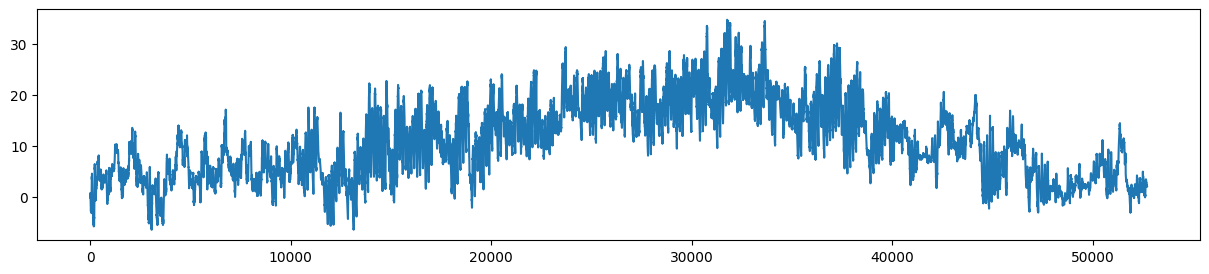

In [252]:
weather['T'].plot(figsize=(15, 3))
plt.show()

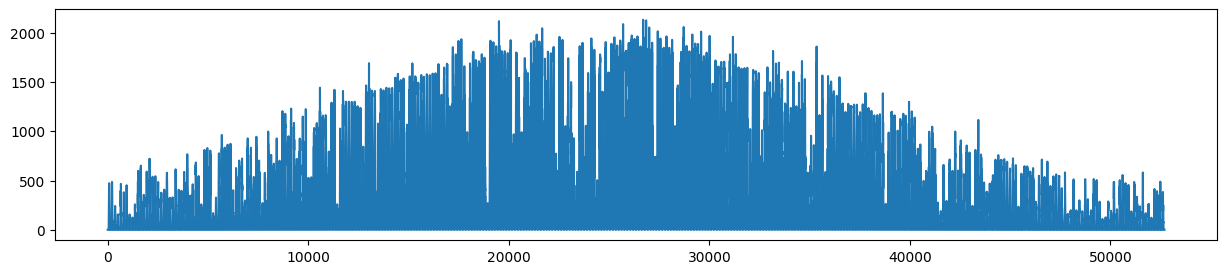

In [253]:
weather['PAR'].plot(figsize=(15, 3)) # radiation
plt.show()

Initial time series -- seasonality is seen

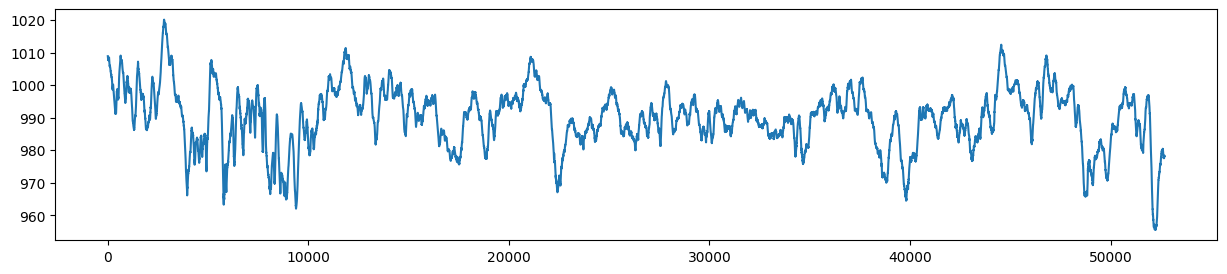

In [254]:
weather['p'].plot(figsize=(15, 3))
plt.show()

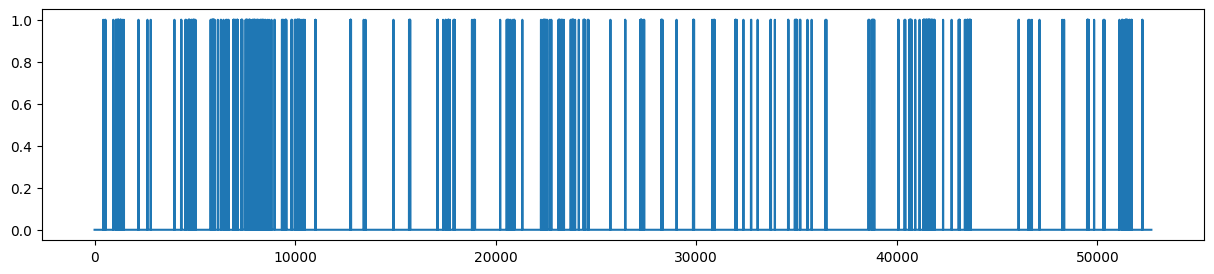

In [255]:
weather['rain_binary'].plot(figsize=(15, 3))
plt.show()

In [256]:
# Convert 'date' column to datetime and sort the data
weather['date'] = pd.to_datetime(weather['date'])
weather_data = weather.sort_values(by='date')

# Resample continuous features (daily averages)
continuous_resampled = weather_data.resample('D', on='date').mean()

# Merge without resampling binary feature
merged_data = pd.merge(continuous_resampled[['T', 'p', 'PAR']],
                       weather_data[['date', 'rain_binary']],
                       left_index=True, right_on='date')

# Drop duplicates (if any) after merging
merged_data = merged_data.drop_duplicates(subset='date')

In [257]:
merged_data.head()

,T,p,PAR,date,rain_binary
143,-1.056319,1001.050972,96.849375,2020-01-02,0
287,4.835278,993.802917,25.155556,2020-01-03,0
431,3.784931,998.244236,18.851875,2020-01-04,0
575,2.735000,1007.105347,65.250694,2020-01-05,0
719,2.644097,1001.261528,39.473681,2020-01-06,0


In [258]:
cols = ['date'] + [x for x in merged_data.columns if x != 'date']
cols

['date', 'T', 'p', 'PAR', 'rain_binary']

In [259]:
# rearrange columns
merged_data = merged_data[cols]
merged_data.head()

,date,T,p,PAR,rain_binary
143,2020-01-02,-1.056319,1001.050972,96.849375,0
287,2020-01-03,4.835278,993.802917,25.155556,0
431,2020-01-04,3.784931,998.244236,18.851875,0
575,2020-01-05,2.735000,1007.105347,65.250694,0
719,2020-01-06,2.644097,1001.261528,39.473681,0


In [260]:
merged_data['unique_id'] = '1' # add unique_id for Nixtla
merged_data.head()

,date,T,p,PAR,rain_binary,unique_id
143,2020-01-02,-1.056319,1001.050972,96.849375,0,1
287,2020-01-03,4.835278,993.802917,25.155556,0,1
431,2020-01-04,3.784931,998.244236,18.851875,0,1
575,2020-01-05,2.735000,1007.105347,65.250694,0,1
719,2020-01-06,2.644097,1001.261528,39.473681,0,1


# splitting to train+test

In [261]:
split_point = int(len(merged_data) * 0.8)

In [262]:
merged_data_par = merged_data.copy()

In [263]:
merged_data['ds'] = merged_data['date']
merged_data['y'] = merged_data['T']
merged_data = merged_data[['ds', 'y', 'p', 'rain_binary', 'unique_id']]
merged_data.head()

,ds,y,p,rain_binary,unique_id
143,2020-01-02,-1.056319,1001.050972,0,1
287,2020-01-03,4.835278,993.802917,0,1
431,2020-01-04,3.784931,998.244236,0,1
575,2020-01-05,2.735000,1007.105347,0,1
719,2020-01-06,2.644097,1001.261528,0,1


In [264]:
merged_data_par['ds'] = merged_data_par['date']
merged_data_par['y'] = merged_data_par['PAR']
merged_data_par= merged_data_par[['ds', 'y', 'p', 'rain_binary', 'unique_id']]
merged_data_par.head()

,ds,y,p,rain_binary,unique_id
143,2020-01-02,96.849375,1001.050972,0,1
287,2020-01-03,25.155556,993.802917,0,1
431,2020-01-04,18.851875,998.244236,0,1
575,2020-01-05,65.250694,1007.105347,0,1
719,2020-01-06,39.473681,1001.261528,0,1


In [265]:
train = merged_data.iloc[:split_point]
test = merged_data.iloc[split_point:]

In [268]:
train_par = merged_data_par.iloc[:split_point]
test_par = merged_data_par.iloc[split_point:]

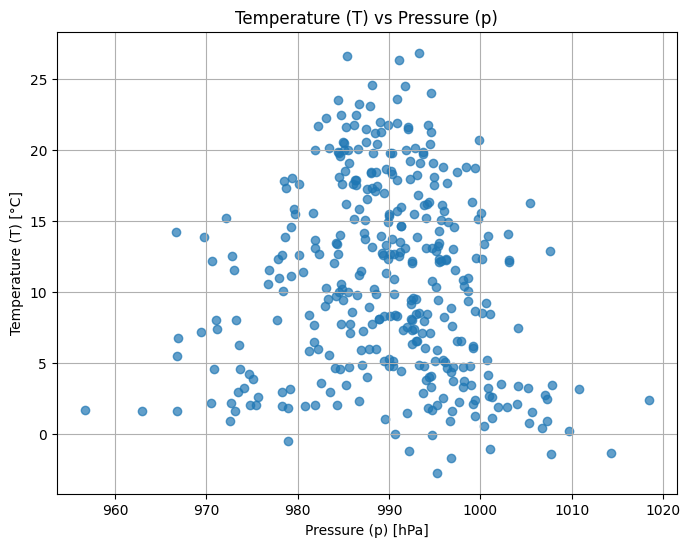

In [269]:
# Scatter plot for Temperature (T) vs Pressure (p)
plt.figure(figsize=(8, 6))
plt.scatter(merged_data['p'], merged_data['y'], alpha=0.7)
plt.title('Temperature (T) vs Pressure (p)')
plt.xlabel('Pressure (p) [hPa]')
plt.ylabel('Temperature (T) [°C]')
plt.grid(True)
plt.show()


There isn't any strong correlation

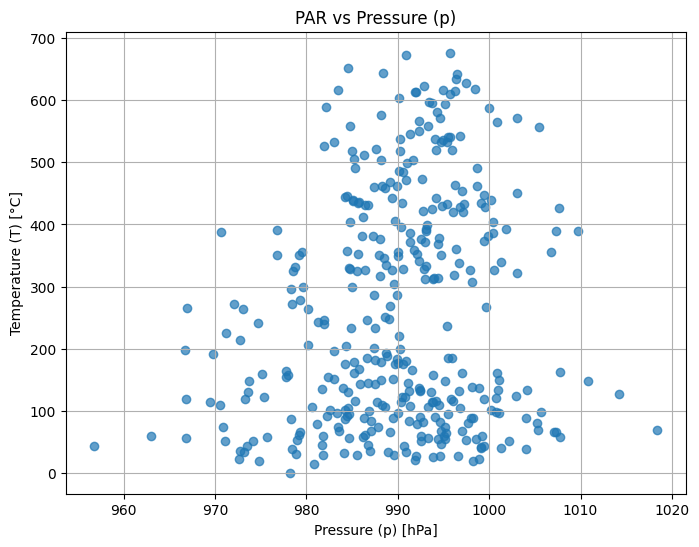

In [226]:
# Scatter plot for Temperature (T) vs Pressure (p)
plt.figure(figsize=(8, 6))
plt.scatter(merged_data['p'], merged_data_par['y'], alpha=0.7)
plt.title('PAR vs Pressure (p)')
plt.xlabel('Pressure (p) [hPa]')
plt.ylabel('Temperature (T) [°C]')
plt.grid(True)
plt.show()


Same case here

# SARIMAX

In [24]:
!pip install statsforecast

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.1/319.1 kB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.6/275.6 kB 24.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.2/278.2 kB 24.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.3/135.3 kB 13.9 MB/s eta 0:00:00


In [25]:
from statsforecast import StatsForecast
from statsforecast.models import AutoARIMA

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


Wanna know what season length to choose

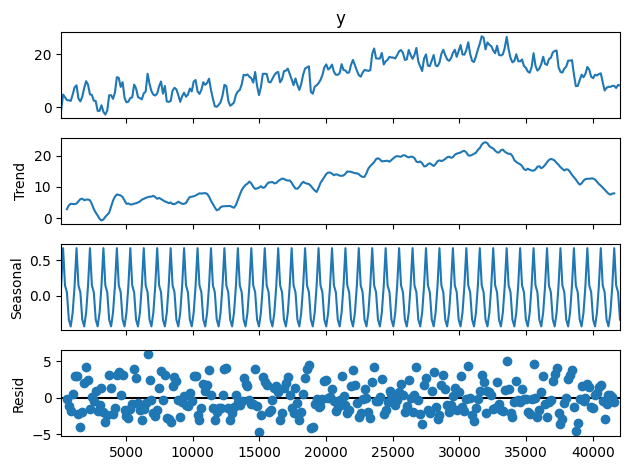

In [96]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(train['y'], model='additive', period=7)  # Test 7 days first
result.plot()
plt.show()

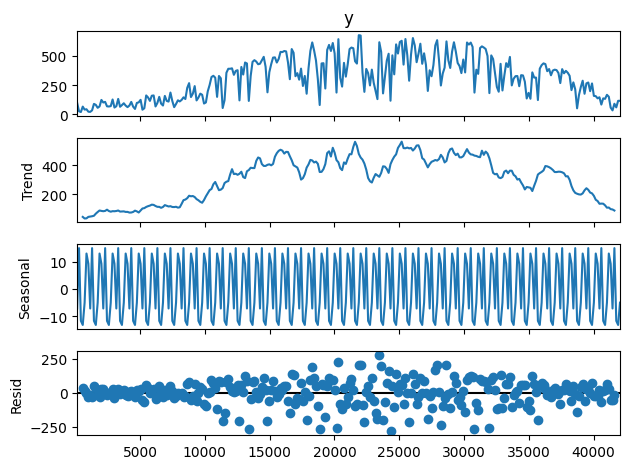

In [228]:
result_par = seasonal_decompose(train_par['y'], model='additive', period=7)  # Test 7 days first
result_par.plot()
plt.show()

In [229]:
acorr_ljungbox(result_par.resid.dropna(), return_df=True) # nans are only present in the first the last observations

,lb_stat,lb_pvalue
1,0.033609,8.545405e-01
2,38.590860,4.169665e-09
3,58.659869,1.136331e-12
4,58.936662,4.851937e-12
5,61.069651,7.304749e-12
6,61.183752,2.586264e-11
7,61.237696,8.541109e-11
8,62.961167,1.219369e-10
9,63.924967,2.333965e-10
10,65.403610,3.392888e-10


In [97]:
# Autocorr test
from statsmodels.stats.diagnostic import acorr_ljungbox

<Axes: >

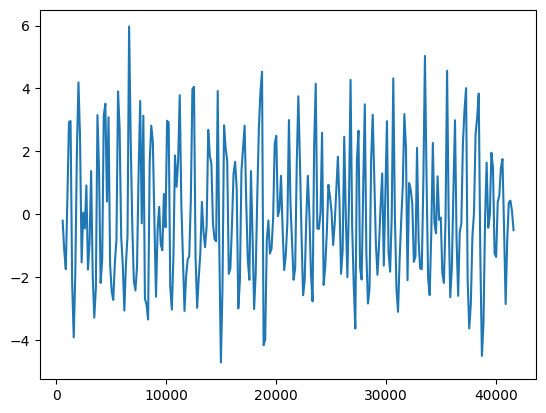

In [98]:
result.resid.plot()

In [99]:
acorr_ljungbox(result.resid.dropna(), return_df=True) # nans are only present in the first the last observations

,lb_stat,lb_pvalue
1,30.539907,3.270690e-08
2,69.895326,6.643895e-16
3,141.778987,1.562650e-30
4,148.571633,4.119012e-31
5,149.108586,2.066631e-30
6,149.579417,9.495294e-30
7,149.910902,4.238616e-29
8,150.899483,1.272903e-28
9,155.123739,7.642174e-29
10,155.125350,3.281265e-28


autocorrelation exists, yet it's the smallest lb value in comparizon with another lenghts; let's try MSTL

In [68]:
from statsmodels.tsa.seasonal import STL, MSTL

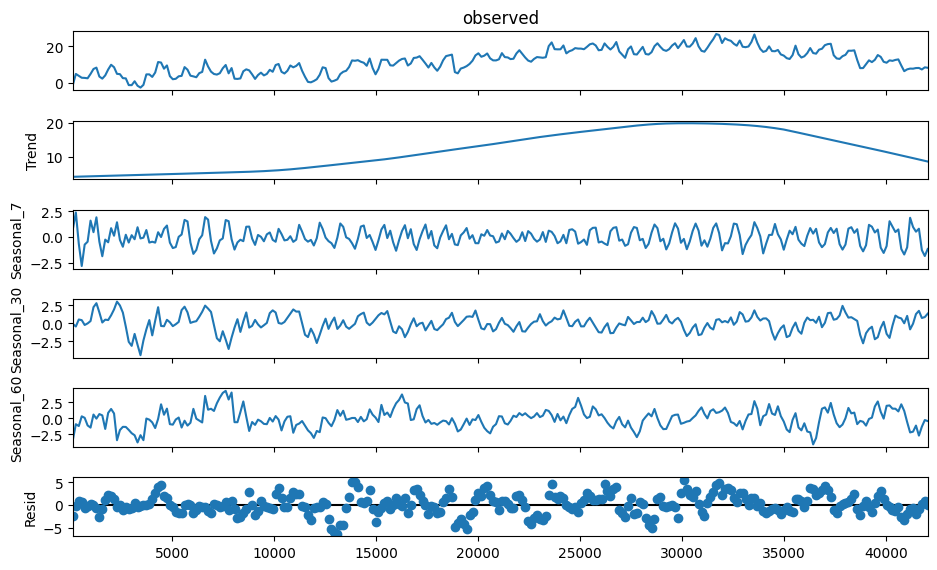

<Axes: >

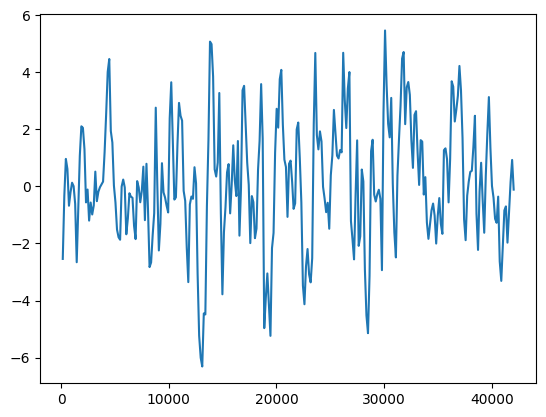

In [100]:
mstl = MSTL(train['y'],  periods=(7, 30, 60))
res = mstl.fit()

fig = res.plot()
fig.set_size_inches(10, 6)
plt.show()

res.resid.plot()

In [70]:
acorr_ljungbox(res.resid.dropna(), return_df=True)

,lb_stat,lb_pvalue
1,145.105204,2.036858e-33
2,180.367044,6.820151e-40
3,188.659998,1.188683e-40
4,190.392500,4.364677e-40
5,190.497509,3.058197e-39
6,194.561690,2.725326e-39
7,206.084672,5.899383e-41
8,209.625587,5.969838e-41
9,210.049642,2.580789e-40
10,211.049901,7.960181e-40


still we see autocorrelation :(

In [270]:
# Initialize AutoARIMA with seasonality
models = [AutoARIMA(seasonal=True, season_length=7, approximation=True)]

sf_with_reg = StatsForecast(models=models, freq='D', n_jobs=-1)

# Fit the model and forecast
forecast_with_reg = sf_with_reg.forecast(
    df=train,
    X_df=test[['ds', 'p', 'rain_binary', 'unique_id']],
    h=len(test)
)

# Display forecast
print(forecast_with_reg)


/usr/local/lib/python3.10/dist-packages/statsforecast/arima.py:479: UserWarning:

possible convergence problem: minimize gave code 2]

/usr/local/lib/python3.10/dist-packages/statsforecast/arima.py:479: UserWarning:

possible convergence problem: minimize gave code 2]

/usr/local/lib/python3.10/dist-packages/statsforecast/arima.py:479: UserWarning:

possible convergence problem: minimize gave code 2]

/usr/local/lib/python3.10/dist-packages/statsforecast/arima.py:479: UserWarning:

possible convergence problem: minimize gave code 2]

/usr/local/lib/python3.10/dist-packages/statsforecast/arima.py:479: UserWarning:

possible convergence problem: minimize gave code 2]

/usr/local/lib/python3.10/dist-packages/statsforecast/arima.py:479: UserWarning:

possible convergence problem: minimize gave code 2]

/usr/local/lib/python3.10/dist-packages/statsforecast/arima.py:479: UserWarning:

possible convergence problem: minimize gave code 2]

/usr/local/lib/python3.10/dist-packages/statsforecast/a

   unique_id         ds  AutoARIMA
0          1 2020-10-20   8.946969
1          1 2020-10-21   9.523280
2          1 2020-10-22   9.094173
3          1 2020-10-23   9.262848
4          1 2020-10-24   9.020848
..       ...        ...        ...
69         1 2020-12-28  12.830278
70         1 2020-12-29  12.071490
71         1 2020-12-30  10.543078
72         1 2020-12-31  10.139776
73         1 2021-01-01  10.228729

[74 rows x 3 columns]


In [103]:
forecast_with_reg.columns = ['unique_id', 'ds', 'y_hat']
forecast_with_reg

,unique_id,ds,y_hat
0,1,2020-10-20,8.946969
1,1,2020-10-21,9.523280
2,1,2020-10-22,9.094173
3,1,2020-10-23,9.262848
4,1,2020-10-24,9.020848
...,...,...,...
69,1,2020-12-28,12.830278
70,1,2020-12-29,12.071490
71,1,2020-12-30,10.543078
72,1,2020-12-31,10.139776


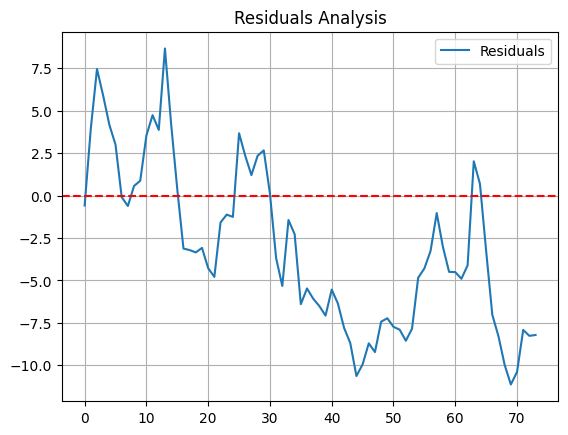

In [105]:
residuals = test['y'].values - forecast_with_reg['y_hat'].values
plt.plot(residuals, label='Residuals')
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals Analysis')
plt.grid(True)
plt.legend()
plt.show()

In [272]:
evaluation_sarimax = evaluate(
    test.merge(forecast_with_reg),
    metrics=metrics,
    train_df=train
)

print('Sarimax:')
display(evaluation_sarimax)

Sarimax:


,unique_id,metric,p,rain_binary,AutoARIMA
0,1,rmse,983.310714,7.383082,5.697173
1,1,mape,897.952358,1.000000,7.162337


In [231]:
# Initialize AutoARIMA with seasonality
models = [AutoARIMA(seasonal=True, season_length=7, approximation=True)]

sf_with_reg = StatsForecast(models=models, freq='D', n_jobs=-1)

# Fit the model and forecast
forecast_with_reg_par = sf_with_reg.forecast(
    df=train_par,
    X_df=test_par[['ds', 'p', 'rain_binary', 'unique_id']],
    h=len(test_par)
)

# Display forecast
print(forecast_with_reg_par)


/usr/local/lib/python3.10/dist-packages/statsforecast/arima.py:479: UserWarning:

possible convergence problem: minimize gave code 2]

/usr/local/lib/python3.10/dist-packages/statsforecast/arima.py:479: UserWarning:

possible convergence problem: minimize gave code 2]

/usr/local/lib/python3.10/dist-packages/statsforecast/arima.py:479: UserWarning:

possible convergence problem: minimize gave code 2]

/usr/local/lib/python3.10/dist-packages/statsforecast/arima.py:479: UserWarning:

possible convergence problem: minimize gave code 2]

/usr/local/lib/python3.10/dist-packages/statsforecast/arima.py:479: UserWarning:

possible convergence problem: minimize gave code 2]

/usr/local/lib/python3.10/dist-packages/statsforecast/arima.py:479: UserWarning:

possible convergence problem: minimize gave code 2]

/usr/local/lib/python3.10/dist-packages/statsforecast/arima.py:479: UserWarning:

possible convergence problem: minimize gave code 2]

/usr/local/lib/python3.10/dist-packages/statsforecast/a

   unique_id         ds   AutoARIMA
0          1 2020-10-20  118.115381
1          1 2020-10-21  103.580801
2          1 2020-10-22  116.955701
3          1 2020-10-23  111.309523
4          1 2020-10-24  119.419936
..       ...        ...         ...
69         1 2020-12-28   -5.900353
70         1 2020-12-29   19.100708
71         1 2020-12-30   69.459885
72         1 2020-12-31   82.748152
73         1 2021-01-01   79.817254

[74 rows x 3 columns]


/usr/local/lib/python3.10/dist-packages/statsforecast/arima.py:479: UserWarning:

possible convergence problem: minimize gave code 2]



In [232]:
forecast_with_reg_par.columns = ['unique_id', 'ds', 'y_hat']
forecast_with_reg_par

,unique_id,ds,y_hat
0,1,2020-10-20,118.115381
1,1,2020-10-21,103.580801
2,1,2020-10-22,116.955701
3,1,2020-10-23,111.309523
4,1,2020-10-24,119.419936
...,...,...,...
69,1,2020-12-28,-5.900353
70,1,2020-12-29,19.100708
71,1,2020-12-30,69.459885
72,1,2020-12-31,82.748152


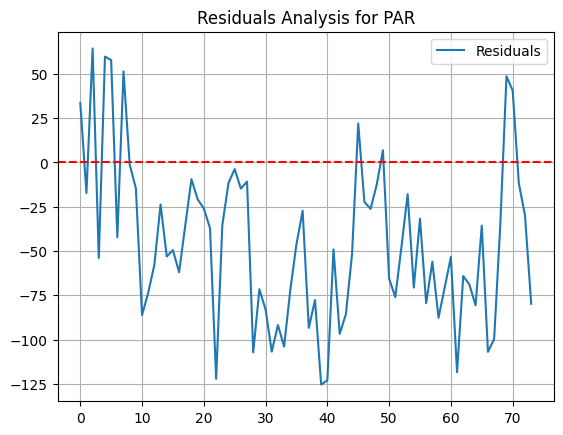

In [233]:
residuals_par = test_par['y'].values - forecast_with_reg_par['y_hat'].values
plt.plot(residuals_par, label='Residuals')
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals Analysis for PAR')
plt.grid(True)
plt.legend()
plt.show()

In [273]:
evaluation_sarimax_par = evaluate(
    test_par.merge(forecast_with_reg_par),
    metrics=metrics,
    train_df=train_par
)

print('Sarimax:')
display(evaluation_sarimax_par)

Sarimax:


,unique_id,metric,p,rain_binary,y_hat
0,1,rmse,912.168497,89.366059,64.346935
1,1,mape,16.841728,1.000000,1.140051


# Prophet model

In [75]:
# no unique_id
import prophet as fp
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
from prophet.plot import add_changepoints_to_plot

In [76]:
train.columns

Index(['ds', 'y', 'p', 'rain_binary', 'unique_id'], dtype='object')

In [106]:
train_fp = train[['ds', 'y', 'p', 'rain_binary']]
test_fp = test[['ds', 'y', 'p', 'rain_binary']]

In [234]:
train_fp_par = train_par[['ds', 'y', 'p', 'rain_binary']]
test_fp_par = test_par[['ds', 'y', 'p', 'rain_binary']]

In [79]:
forecast_horizon = len(test)

In [107]:
# 1. Create an object of the Prophet class (all model parameters are set in the class constructor, using default values)
m = fp.Prophet()

# 2. Train the model
m.fit(train_fp)

# 3. Create a table with dates covering both the historical data and the "forecast horizon"
future = m.make_future_dataframe(periods=forecast_horizon)

# 4. Obtain predictions for the dates generated in the previous step
forecast_prophet = m.predict(future)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkz614rwb/rugk67hc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkz614rwb/riewiky6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19885', 'data', 'file=/tmp/tmpkz614rwb/rugk67hc.json', 'init=/tmp/tmpkz614rwb/riewiky6.json', 'output', 'file=/tmp/tmpkz614rwb/prophet_modeljeewi7vb/prophet_model-20241223181707.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:17:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:17:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [108]:
forecast_prophet.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-02,1.874915,-2.093541,5.986943,1.874915,1.874915,0.070805,0.070805,0.070805,0.070805,0.070805,0.070805,0.0,0.0,0.0,1.945720
1,2020-01-03,1.949876,-1.521662,6.664701,1.949876,1.949876,0.715574,0.715574,0.715574,0.715574,0.715574,0.715574,0.0,0.0,0.0,2.665450
2,2020-01-04,2.024836,-1.783526,6.191149,2.024836,2.024836,0.144689,0.144689,0.144689,0.144689,0.144689,0.144689,0.0,0.0,0.0,2.169526
3,2020-01-05,2.099797,-1.731875,6.006446,2.099797,2.099797,0.038962,0.038962,0.038962,0.038962,0.038962,0.038962,0.0,0.0,0.0,2.138759
4,2020-01-06,2.174757,-2.238063,5.507110,2.174757,2.174757,-0.342868,-0.342868,-0.342868,-0.342868,-0.342868,-0.342868,0.0,0.0,0.0,1.831889


In [109]:
fig = px.line(title="Weather")
fig.add_scatter(x=train['ds'], y=train['y'], mode='lines', name='train', line=dict(color='blue'))
fig.add_scatter(x=test['ds'], y=test['y'], mode='lines', name='test', line=dict(color='green'))
fig.add_scatter(x=forecast_prophet['ds'], y=forecast_prophet['yhat'], mode='lines', name='forecast', line=dict(color='red'))


fig.update_layout(template='plotly_white', width=1000, height=500)
fig.update_xaxes(title_text="date")
fig.update_yaxes(title_text="weather")
fig.show()

In [110]:
# Evaluate quality
from utilsforecast.losses import rmse, mape
from utilsforecast.evaluation import evaluate

In [111]:
metrics = [rmse, mape]

In [115]:
forecast_prophet['unique_id'] = '1'

evaluation_prophet = evaluate(
    test.merge(forecast_prophet[['unique_id','ds','yhat']]),
    metrics=metrics,
    train_df=train
)
evaluation_prophet

,unique_id,metric,p,rain_binary,yhat
0,1,rmse,983.310714,7.383082,3.544055
1,1,mape,897.952358,1.000000,3.420704


let's tune prophet

In [117]:
# Tuning
import itertools
from tqdm import tqdm

In [140]:
param_grid = {
    'changepoint_prior_scale': [0.05,0.1,0.5],
    'seasonality_prior_scale': [0.001,0.1,10.0],
    'seasonality_mode':['multiplicative','additive']
}

# Create all combinations of parameters
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]

len(all_params)

18

In [142]:
# Hyperparameter grid for tuning
all_params = [
    {'changepoint_prior_scale': cps, 'seasonality_prior_scale': sps, 'seasonality_mode': mode}
    for cps in [0.01, 0.1, 0.5, 1.0]  # Range for changepoint prior
    for sps in [0.01, 0.1, 1.0, 10.0]  # Range for seasonality prior
    for mode in ['additive', 'multiplicative']  # Seasonal mode options
]

# Store Mean Absolute Percentage Errors (MAPE)
mapes = []

# Cross-validation loop
for params in tqdm(all_params):
    # Initialize the model with params
    m = fp.Prophet(
        changepoint_prior_scale=params['changepoint_prior_scale'],
        seasonality_prior_scale=params['seasonality_prior_scale'],
        seasonality_mode=params['seasonality_mode'],
        weekly_seasonality=True
    )

    # Add regressors
    m.add_regressor('p', mode=params['seasonality_mode'])           # Continuous
    m.add_regressor('rain_binary', mode=params['seasonality_mode']) # Binary

    # Fit the model
    m.fit(train_fp)

    # Cross-validation
    df_cv = cross_validation(
        m,
        initial='220 days',    # ~80% of the data as initial training
        period='10 days',      # Sliding window step size (adjustable)
        horizon='62 days',     # Test set size
        parallel="processes"   # Faster computation
    )

    # Calculate performance metrics
    df_p = performance_metrics(df_cv, rolling_window=1)
    mapes.append(df_p['mape'].values[0])  # Store MAPE

  0%|          | 0/32 [00:00<?, ?it/s]INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkz614rwb/wklbmnxy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkz614rwb/00s6xtfz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72073', 'data', 'file=/tmp/tmpkz614rwb/wklbmnxy.json', 'init=/tmp/tmpkz614rwb/00s6xtfz.json', 'output', 'file=/tmp/tmpkz614rwb/prophet_modely8pgf_3r/prophet_model-20241223190008.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:00:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:00:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
IN

In [236]:
# Hyperparameter grid for tuning
all_params = [
    {'changepoint_prior_scale': cps, 'seasonality_prior_scale': sps, 'seasonality_mode': mode}
    for cps in [0.01, 0.1, 0.5, 1.0]  # Range for changepoint prior
    for sps in [0.01, 0.1, 1.0, 10.0]  # Range for seasonality prior
    for mode in ['additive', 'multiplicative']  # Seasonal mode options
]

# Store Mean Absolute Percentage Errors (MAPE)
mapes_par = []

# Cross-validation loop
for params in tqdm(all_params):
    # Initialize the model with params
    m = fp.Prophet(
        changepoint_prior_scale=params['changepoint_prior_scale'],
        seasonality_prior_scale=params['seasonality_prior_scale'],
        seasonality_mode=params['seasonality_mode'],
        weekly_seasonality=True
    )

    # Add regressors
    m.add_regressor('p', mode=params['seasonality_mode'])           # Continuous
    m.add_regressor('rain_binary', mode=params['seasonality_mode']) # Binary

    # Fit the model
    m.fit(train_fp_par)

    # Cross-validation
    df_cv = cross_validation(
        m,
        initial='220 days',    # ~80% of the data as initial training
        period='10 days',      # Sliding window step size (adjustable)
        horizon='62 days',     # Test set size
        parallel="processes"   # Faster computation
    )

    # Calculate performance metrics
    df_p = performance_metrics(df_cv, rolling_window=1)
    mapes_par.append(df_p['mape'].values[0])  # Store MAPE

  0%|          | 0/32 [00:00<?, ?it/s]INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkz614rwb/c0wrced3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkz614rwb/ejarb_z0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=37780', 'data', 'file=/tmp/tmpkz614rwb/c0wrced3.json', 'init=/tmp/tmpkz614rwb/ejarb_z0.json', 'output', 'file=/tmp/tmpkz614rwb/prophet_modellfbg233m/prophet_model-20241223200359.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:03:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:03:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
IN

In [143]:
# Find the best parameters
tuning_results = pd.DataFrame(all_params)
tuning_results['mape'] = mapes
tuning_results.sort_values(by='mape')

,changepoint_prior_scale,seasonality_prior_scale,seasonality_mode,mape
25,1.00,0.01,multiplicative,0.911932
27,1.00,0.10,multiplicative,0.917122
29,1.00,1.00,multiplicative,0.919237
31,1.00,10.00,multiplicative,0.920138
28,1.00,1.00,additive,0.920489
26,1.00,0.10,additive,0.922153
24,1.00,0.01,additive,0.922573
30,1.00,10.00,additive,0.924855
0,0.01,0.01,additive,0.951099
22,0.50,10.00,additive,0.955351


In [237]:
# Find the best parameters
tuning_results_par = pd.DataFrame(all_params)
tuning_results_par['mape'] = mapes_par
tuning_results_par.sort_values(by='mape')

,changepoint_prior_scale,seasonality_prior_scale,seasonality_mode,mape
25,1.00,0.01,multiplicative,0.833795
30,1.00,10.00,additive,0.836792
24,1.00,0.01,additive,0.842068
28,1.00,1.00,additive,0.844262
27,1.00,0.10,multiplicative,0.844852
29,1.00,1.00,multiplicative,0.847471
31,1.00,10.00,multiplicative,0.854808
26,1.00,0.10,additive,0.887410
21,0.50,1.00,multiplicative,0.968504
19,0.50,0.10,multiplicative,0.969289


In [144]:
best_params = all_params[tuning_results.sort_values(by='mape').index[0]]
best_params

{'changepoint_prior_scale': 1.0,
 'seasonality_prior_scale': 0.01,
 'seasonality_mode': 'multiplicative'}

In [238]:
best_params_par = all_params[tuning_results_par.sort_values(by='mape').index[0]]
best_params_par

{'changepoint_prior_scale': 1.0,
 'seasonality_prior_scale': 0.01,
 'seasonality_mode': 'multiplicative'}

In [145]:
# 1. Create an object of the Prophet class (all model parameters are set in the class constructor, using default values)
m_tuned = fp.Prophet(**best_params)

# 2. Add regressor
m_tuned.add_regressor('p', mode=params['seasonality_mode'])           # Continuous
m_tuned.add_regressor('rain_binary', mode=params['seasonality_mode']) # Binary

# 3. Train the model
m_tuned.fit(train_fp)



INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkz614rwb/i8me9eod.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkz614rwb/2djre20k.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88119', 'data', 'file=/tmp/tmpkz614rwb/i8me9eod.json', 'init=/tmp/tmpkz614rwb/2djre20k.json', 'output', 'file=/tmp/tmpkz614rwb/prophet_modelqnqm2ysd/prophet_model-20241223190034.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:00:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:00:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [239]:
# 1. Create an object of the Prophet class (all model parameters are set in the class constructor, using default values)
m_tuned_par = fp.Prophet(**best_params_par)

# 2. Add regressor
m_tuned_par.add_regressor('p', mode=params['seasonality_mode'])           # Continuous
m_tuned_par.add_regressor('rain_binary', mode=params['seasonality_mode']) # Binary

# 3. Train the model
m_tuned_par.fit(train_fp_par)



INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkz614rwb/tp45zl7e.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkz614rwb/yn2qa3ai.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61421', 'data', 'file=/tmp/tmpkz614rwb/tp45zl7e.json', 'init=/tmp/tmpkz614rwb/yn2qa3ai.json', 'output', 'file=/tmp/tmpkz614rwb/prophet_models86fe4wy/prophet_model-20241223200610.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:06:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:06:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [146]:
# 4. Create a table with dates covering both the historical data and the "forecast horizon"
future = m_tuned.make_future_dataframe(periods=forecast_horizon)


In [240]:
# 4. Create a table with dates covering both the historical data and the "forecast horizon"
future_par = m_tuned_par.make_future_dataframe(periods=forecast_horizon)


In [148]:
future['p'] = merged_data['p'].values # Future regressor values
future['rain_binary'] = merged_data['rain_binary'].values
# 5. Obtain predictions for the dates generated in the previous step
forecast_tuned = m_tuned.predict(future)

In [241]:
future_par['p'] = merged_data_par['p'].values # Future regressor values
future_par['rain_binary'] = merged_data_par['rain_binary'].values
# 5. Obtain predictions for the dates generated in the previous step
forecast_tuned_par = m_tuned_par.predict(future_par)
forecast_tuned_par['unique_id'] = '1'

In [149]:
forecast_tuned['unique_id'] = '1'

evaluation_prophet_tuned = evaluate(
    test.merge(forecast_tuned[['unique_id','ds','yhat']]),
    metrics=metrics,
    train_df=train_fp
)
evaluation_prophet_tuned

,unique_id,metric,p,rain_binary,yhat
0,1,rmse,983.310714,7.383082,6.512712
1,1,mape,897.952358,1.000000,2.848868


In [242]:
evaluation_prophet_tuned_par = evaluate(
    test_par.merge(forecast_tuned_par[['unique_id','ds','yhat']]),
    metrics=metrics,
    train_df=train_fp_par
)
evaluation_prophet_tuned_par

,unique_id,metric,p,rain_binary,yhat
0,1,rmse,912.168497,89.366059,100.932929
1,1,mape,16.841728,1.000000,1.628645


# MSTL and AutoTheta

In [159]:
from statsforecast.models import MSTL

In [173]:
models = [
    MSTL(
        season_length=[7, 31], # define seasonal periods
        trend_forecaster=AutoARIMA()
        )
]

sf = StatsForecast(models=models, freq='D', n_jobs=-1)

forecast = sf.forecast(df=train, X_df=test[['ds', 'p', 'rain_binary', 'unique_id']], h=forecast_horizon)


fig = px.line(title="Weather")
fig.add_scatter(x=train_fp['ds'], y=train_fp['y'], mode='lines', name='train', line=dict(color='blue'))
fig.add_scatter(x=test_fp['ds'], y=test_fp['y'], mode='lines', name='test', line=dict(color='green'))
fig.add_scatter(x=forecast['ds'], y=forecast['MSTL'], mode='lines', name='forecast', line=dict(color='red'))

fig.update_layout(template='plotly_white', width=1000, height=500)
fig.update_xaxes(title_text="date")
fig.update_yaxes(title_text="sales")
fig.show()

In [244]:
models = [
    MSTL(
        season_length=[7, 31], # define seasonal periods
        trend_forecaster=AutoARIMA()
        )
]

sf = StatsForecast(models=models, freq='D', n_jobs=-1)

forecast_par = sf.forecast(df=train_par, X_df=test_par[['ds', 'p', 'rain_binary', 'unique_id']], h=forecast_horizon)


fig = px.line(title="Weather")
fig.add_scatter(x=train_fp_par['ds'], y=train_fp_par['y'], mode='lines', name='train', line=dict(color='blue'))
fig.add_scatter(x=test_fp_par['ds'], y=test_fp_par['y'], mode='lines', name='test', line=dict(color='green'))
fig.add_scatter(x=forecast_par['ds'], y=forecast_par['MSTL'], mode='lines', name='forecast', line=dict(color='red'))

fig.update_layout(template='plotly_white', width=1000, height=500)
fig.update_xaxes(title_text="date")
fig.update_yaxes(title_text="weather")
fig.show()

In [174]:
evaluation_MSTL = evaluate(
    test.merge(forecast),
    metrics=metrics,
    train_df=train
)

print('MSTL:')
display(evaluation_MSTL)

MSTL:


,unique_id,metric,p,rain_binary,MSTL
0,1,rmse,983.310714,7.383082,5.636624
1,1,mape,897.952358,1.000000,7.215420


In [245]:
evaluation_MSTL_par = evaluate(
    test_par.merge(forecast_par),
    metrics=metrics,
    train_df=train_par
)

print('MSTL:')
display(evaluation_MSTL_par)

MSTL:


,unique_id,metric,p,rain_binary,MSTL
0,1,rmse,912.168497,89.366059,75.253590
1,1,mape,16.841728,1.000000,1.246179


In [176]:
from statsforecast.models import AutoTheta

In [178]:
models = [
    AutoTheta(season_length=7)
]

sf = StatsForecast(models=models, freq='D', n_jobs=-1)

forecast_theta = sf.forecast(df=train, X_df=test[['ds', 'p', 'rain_binary', 'unique_id']], h=forecast_horizon)



fig = px.line(title="Weather")
fig.add_scatter(x=train['ds'], y=train['y'], mode='lines', name='train', line=dict(color='blue'))
fig.add_scatter(x=test['ds'], y=test['y'], mode='lines', name='test', line=dict(color='green'))
fig.add_scatter(x=forecast_theta['ds'], y=forecast_theta['AutoTheta'], mode='lines', name='forecast', line=dict(color='red'))

fig.update_layout(template='plotly_white', width=1000, height=500)
fig.update_xaxes(title_text="date")
fig.update_yaxes(title_text="sales")
fig.show()

In [246]:
models = [
    AutoTheta(season_length=7)
]

sf = StatsForecast(models=models, freq='D', n_jobs=-1)

forecast_theta_par = sf.forecast(df=train_par, X_df=test_par[['ds', 'p', 'rain_binary', 'unique_id']], h=forecast_horizon)



fig = px.line(title="Weather")
fig.add_scatter(x=train_par['ds'], y=train_par['y'], mode='lines', name='train', line=dict(color='blue'))
fig.add_scatter(x=test_par['ds'], y=test_par['y'], mode='lines', name='test', line=dict(color='green'))
fig.add_scatter(x=forecast_theta_par['ds'], y=forecast_theta_par['AutoTheta'], mode='lines', name='forecast', line=dict(color='red'))

fig.update_layout(template='plotly_white', width=1000, height=500)
fig.update_xaxes(title_text="date")
fig.update_yaxes(title_text="sales")
fig.show()

In [179]:
evaluation_theta = evaluate(
    test.merge(forecast_theta),
    metrics=metrics,
    train_df=train
)

print('AutoTheta:')
display(evaluation_theta)

AutoTheta:


,unique_id,metric,p,rain_binary,AutoTheta
0,1,rmse,983.310714,7.383082,5.890924
1,1,mape,897.952358,1.000000,7.731724


In [247]:
evaluation_theta_par = evaluate(
    test_par.merge(forecast_theta_par),
    metrics=metrics,
    train_df=train_par
)

print('AutoTheta:')
display(evaluation_theta_par)

AutoTheta:


,unique_id,metric,p,rain_binary,AutoTheta
0,1,rmse,912.168497,89.366059,51.578989
1,1,mape,16.841728,1.000000,1.005352


best model for temperature: MSTL,
best model for PAR: AutoTheta